# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable /(pretty printer)
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])  

{"type":"FeatureCollection","metadata":{"generated":1583258657000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.8.1","count":392},"features":[{"type":"Feature","properties":{"mag":4.9,"place":"Chagos Archipelago region","time":1583256677111,"updated":1583257842040,"tz":300,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us600088si","detail":"https://earthquake.usgs.gov/earthqu


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 4.9, 'place': 'Chagos Archipelago region', 'time': 1583256677111, 'updated': 1583257842040, 'tz': 300, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us600088si', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us600088si.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 369, 'net': 'us', 'code': '600088si', 'ids': ',us600088si,', 'sources': ',us,', 'types': ',geoserve,origin,phase-data,', 'nst': None, 'dmin': 5.245, 'rms': 0.59, 'gap': 38, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.9 - Chagos Archipelago region'}, 'geometry': {'type': 'Point', 'coordinates': [68.3956, -4.0398, 33.72]}, 'id': 'us600088si'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [68.3956, -4.0398, 33.72], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '600088si',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us600088si.geojson',
 'dmin': 5.245,
 'felt': None,
 'gap': 38,
 'ids': ',us600088si,',
 'mag': 4.9,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': 'Chagos Archipelago region',
 'rms': 0.59,
 'sig': 369,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1583256677111,
 'title': 'M 4.9 - Chagos Archipelago region',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,phase-data,',
 'tz': 300,
 'updated': 1583257842040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us600088si'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.9 - Chagos Archipelago region
M 3.1 - 11km S of Indios, Puerto Rico
M 5.0 - 80km WSW of Port-Vila, Vanuatu
M 2.5 - 15km SSE of Guanica, Puerto Rico
M 4.0 - 10km NNE of New Idria, CA
M 5.0 - 16km W of Siocon, Philippines
M 2.7 - 21km N of Ridgecrest, CA
M 3.4 - 2km WSW of Fuig, Puerto Rico
M 2.6 - 37km NNW of Valdez, Alaska
M 2.7 - 10km SSE of Guanica, Puerto Rico
M 5.0 - Greenland Sea
M 2.6 - 0km NW of Tallaboa, Puerto Rico
M 4.2 - 67km SSE of Lar, Iran
M 2.7 - 4km ENE of Pahala, Hawaii
M 3.1 - 7km SSW of Guanica, Puerto Rico
M 3.2 - 6km SSW of Guanica, Puerto Rico
M 4.9 - 70km SSE of Bristol Island, South Sandwich Islands
M 2.8 - 4km SSW of Guanica, Puerto Rico
M 4.6 - 31km S of Nishinoomote, Japan
M 4.8 - 21km SSW of Nishinoomote, Japan
M 4.7 - 103km NNW of Pathein, Burma
M 5.1 - 50km W of Amatignak Island, Alaska
M 3.4 - 73km NW of San Antonio, Puerto Rico
M 2.9 - 2km SE of Guayanilla, Puerto Rico
M 3.2 - 26km SSE of Guanica, Puerto Rico
M 4.6 - 90km W of Kota Ternate, Indonesia

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

392


In [9]:
# print the first few lines of data

print(df.head())

   magnitude  depth
0       4.90  33.72
1       3.09   8.00
2       5.00  10.00
3       2.49  10.00
4       3.99   8.98


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  392.000000  392.000000
mean     3.372959   35.287296
std      0.899192   76.509633
min      2.450000   -1.890000
25%      2.637500    9.000000
50%      2.950000   11.000000
75%      4.200000   18.497500
max      5.900000  601.590000


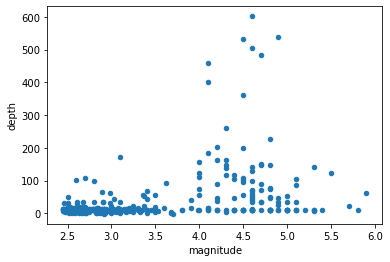

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [15]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude  depth
0           0       4.90  33.72
1           1       3.09   8.00
2           2       5.00  10.00
3           3       2.49  10.00
4           4       3.99   8.98


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [ ]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [ ]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

In [ ]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

In [ ]:
# print it more nicely

pp.pprint(data)

In [ ]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [22]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [26]:
# these keys and tokens are for the Twitter account named @cp255demo2
consumer_key = 'Bv0IwVzDqMTvWwrrDznsltjth'
consumer_secret = '6hhd8FSjgOD0j8gWt7D0AUNzAPolT4LguTQrsEYXQZYzNhGzDD'
access_token = '3788395579-Sze621y2fEBLxeP7Tk4gfZU0K8GHtGwaGvWvMRG'
access_token_secret = 'aLxGudchDv0lwjpSAR9JOw2Npsv5A9qLn2rZFxq6f2oXc'

In [25]:
# import API credentials from keys.py file in the
# same directory as this notebook

#from keys import *

ModuleNotFoundError: No module named 'keys'

In [27]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [28]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @UKFootball: #SpringPractice Day ☝️ ✅

#BBN #WhyNot?  😼🏈 https://t.co/4LLEJi7eAp


In [29]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 03 17:49:07 +0000 2020',
 'entities': {'hashtags': [{'indices': [16, 31], 'text': 'SpringPractice'},
                           {'indices': [42, 46], 'text': 'BBN'},
                           {'indices': [47, 54], 'text': 'WhyNot'}],
              'media': [{'display_url': 'pic.twitter.com/4LLEJi7eAp',
                         'expanded_url': 'https://twitter.com/UKFootball/status/1234897262699900928/photo/1',
                         'id': 1234896972303060992,
                         'id_str': '1234896972303060992',
                         'indices': [60, 83],
                         'media_url': 'http://pbs.twimg.com/tweet_video_thumb/ESM8QOhUUAAmvxy.jpg',
                         'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/ESM8QOhUUAAmvxy.jpg',
                         'sizes': {'large': {'h': 750,
                                             'resize': 'fit',
                                    

### Other API endpoints allow different types of searches

In [30]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @UKBasketbalI: ITS GAMEDAY!!! Home Finale! 

🏀 vs Tennessee
⏰ 9:00pm EST
📍Rupp Arena
📺 ESPN
#BBN https://t.co/pIkKc5VQtP

RT @DerekLAnderson: It Can Be DONE!!
Swept the SEC w/ 16-0 Record
27.1 Average Margin of Victory 
Scored 86 points at Halftime 
Won the NCA…

RT @DerekLAnderson: It Can Be DONE!!
Swept the SEC w/ 16-0 Record
27.1 Average Margin of Victory 
Scored 86 points at Halftime 
Won the NCA…

RT @brianwkyt: Nate Sestina surprised by his parents today!! #BBN #WKYT https://t.co/d2Q0R7iVmv

@Work_Horse68 @UKSportsNetwork Just another brick in the wall. Go CATS!!! #BBN



In [33]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @VandanaRajpoot_: रिट्वीट करने वाले सभी दोस्तों को फॉलो करें
@Cute_Rupali_
@PuriSunidhi 
@priya1_official 
@sharadprjha
@Raghuwanshi_1
@…

Bhai koi load karwa do Mujhe paisy mery ghar aaky lelo

RT @srinivasiyc: PMO से मिले इस RTI जबाब के अनुसार अगर देश के प्रधानमंत्री को 'नागरिकता कानून 1955 की धारा 3' के तहत नागरिकता दर्ज कराने की…

RT @DeepikaThakur_: आज दिल्ली में जिन लोगों ने स्कूल जलाए हैं, कभी उनके पूर्वज विश्व-प्रसिद्ध तक्षशिला, नालंदा, विक्रमशिला और ओदंतपुरी जैसे…

RT @YearOfTheKraken: "Bol yeh rahe hain magar shabd hamare hain."
-George Soros



In [34]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

I've been on the Sunset strip in Hollywood many times through the years!The First time in the Summer of 2005 I was… https://t.co/qZgxDFkwmd

The Corner of CLARK STREET  and SUNSET BOULEVARD...  Hollywood, California  !  😎 ... The Whiskey a go go 🔊🎶🎵🎶🎵

https://t.co/Kwr1IwGohP

😎 https://t.co/7rZt9Bhnmm

Nobody likes you Tennessee,  why is that ? ALABAMA, GEORGIA, FLORIDA, LSU , ETC !  The National news media makes fu… https://t.co/josOnPPreN

ALABAMA OWNS SEC FOOTBALL 🏈 and KENTUCKY OWNS SEC BASKETBALL🏀!  The Tennessee Volunteers ain't Jack Shit in either… https://t.co/fxU24OnbBz

Hi. 😇 https://t.co/mlwgaG7VbT

Happy Birthday kinleyhuesman ! @ University of Kentucky https://t.co/gS0iGHshUy

I sent my mom this picture saying “another horse!!” And she replies “so you want a pony now??” https://t.co/1IxGNjYImi

Congratulations to the the CKCB and UKSB on the marvelous concert tonight.  Elsa's Procession was a fitting closer… https://t.co/titahkl1CW

Me ✔ I'll be in Gainesville, Florida 🏁 

### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [37]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Tue Mar 03 18:33:10 +0000 2020
Trinity, FL, United States
@MrDiddy85 Desperate ppl use all excuses - just do it: EXIT

Tue Mar 03 18:33:10 +0000 2020
İzmir, Türkiye, Türkiye
@bodur_bodur63K 😂😂😂👍🏻

Tue Mar 03 18:33:10 +0000 2020
Cancun, Mexico
#21 😊

Tue Mar 03 18:33:10 +0000 2020
San Jose, CA, United States
@jamiemmacmillan @Buckaroosamurai

Tue Mar 03 18:33:10 +0000 2020
Córdoba, Argentina, Argentina
@nexogol_nexofin @Nexofin Se quedó sin aliento

Tue Mar 03 18:33:10 +0000 2020
Montebello, CA, United States
I love my sister ❤️ @jayyluuu

Tue Mar 03 18:33:10 +0000 2020
Querétaro, Querétaro Arteaga, México
Real jajaja

Tue Mar 03 18:33:10 +0000 2020
Katsushika-ku, Tokyo, Japan
葛飾区柴又六丁目 23-19 https://t.co/4dn497L1zN

Tue Mar 03 18:33:10 +0000 2020
University Park, FL, United States
This kinda hit im not gone cap

Tue Mar 03 18:33:10 +0000 2020
London, England, United Kingdom
#NeverBloomberg spent millions to #bloombergbought Alabama voters. But in #Selma he wouldn’t talk to them https://

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
